In [2]:
import pandas as pd
import numpy as np
!pip install sk-dist
!pip install pyspark


from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_20newsgroups, load_digits
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.pipeline import Pipeline
from skdist.distribute.predict import get_prediction_udf
from pyspark.sql import SparkSession, functions as F


In [3]:
from skdist.distribute.multiclass import (
    DistOneVsRestClassifier,
    DistOneVsOneClassifier
    )
from sklearn.metrics import (
    f1_score, precision_score, recall_score, roc_auc_score
    )
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from pyspark.sql import SparkSession



spark = (
    SparkSession
    .builder
    .getOrCreate()
    )
sc = spark.sparkContext

In [4]:
def model5(trdata,tract,tsdata):
    model = LogisticRegression(solver='lbfgs',max_iter=2000).fit(trdata,tract)
    pred= model.predict(tsdata)
    return pred


def normalizedata(X_train):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    return X_train


def model1(trdata,tract,tsdata):
    model = MultinomialNB()
    model.fit(trdata,tract)
    pred= model.predict(tsdata)
    return pred

def model2(trdata,tract,tsdata):
    model = BernoulliNB()
    model.fit(trdata,tract)
    pred= model.predict(tsdata)
    return pred

def model4(trdata,tract,tsdata):
    model = GaussianNB()
    model.fit(trdata,tract)
    pred= model.predict(tsdata)
    return pred


def model6(trdata,tract,tsdata):
    model = DecisionTreeClassifier().fit(trdata,tract)
    pred= model.predict(tsdata)
    return pred

def model7(trdata,tract,tsdata):
    #model=RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1).fit(trdata,tract)
    model = SVC(kernel='linear').fit(trdata,tract)
    pred= model.predict(tsdata)
    return pred

def model8(trdata,tract,tsdata):
    #model=AdaBoostClassifier().fit(trdata,tract)
    model = SVC(kernel='poly').fit(trdata,tract)
    pred= model.predict(tsdata)
    return pred

def model9(trdata,tract,tsdata):
    model = SVC(kernel='rbf', probability=True).fit(trdata,tract)
    pred= model.predict(tsdata)
    pred_score = model.predict_proba(tsdata) # Changed only for this model
    print()
    return pred , pred_score

def model10(trdata,tract,tsdata):
    model = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(trdata.shape[1], 2), random_state=1,max_iter=500).fit(trdata,tract)
    pred= model.predict(tsdata)
    return pred

def model11(trdata,tract,tsdata):
    model = MLPClassifier(solver='sgd', hidden_layer_sizes=(trdata.shape[1], 2), random_state=1,max_iter=500).fit(trdata,tract)
    pred= model.predict(tsdata)
    return pred

def model12(trdata,tract,tsdata):
    model = MLPClassifier(solver='adam', hidden_layer_sizes=(trdata.shape[1], 2), random_state=1,max_iter=500).fit(trdata,tract)
    pred= model.predict(tsdata)
    return pred

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(3)
for i in range(31,51):
    print(i)
    fname='/content/drive/MyDrive/Twitter Sentiment Analysis/smote outputs/Final/'+str(i)+'.csv'
    data=np.genfromtxt(fname,delimiter=',')
    np.random.shuffle(data)
    data=data[0:4000,:]
    #sequence = [i for i in range(np.shape(data)[0])]
    #subset = sample(sequence, 2000)
    #data=data[subset,:]
    predvalue=np.zeros((np.shape(data)[0],12))
    data[:,0:-1]=normalizedata(data[:,0:-1])
    trdata, tsdata,  tract, tsact = train_test_split(data[:,0:-1], data[:,-1], test_size=0.3, random_state=10)
    predvalue=np.zeros((np.shape(tsdata)[0],12))
    predvalue[:,0]=model1(trdata,tract,tsdata)
    predvalue[:,1]=model2(trdata,tract,tsdata)
    predvalue[:,2]=model4(trdata,tract,tsdata)
    predvalue[:,3]=model5(trdata,tract,tsdata)
    predvalue[:,4]=model6(trdata,tract,tsdata)
    predvalue[:,5]=model7(trdata,tract,tsdata)
    predvalue[:,6]=model8(trdata,tract,tsdata)
    predvalue[:,7]=model9(trdata,tract,tsdata)
    predvalue[:,8]=model10(trdata,tract,tsdata)
    predvalue[:,9]=model11(trdata,tract,tsdata)
    predvalue[:,10]=model12(trdata,tract,tsdata)
    predvalue[:,11]=tsact
    #for train_index, test_index in kf.split(data):
     #   trdata=data[train_index,0:-1]
      #  tsdata=data[test_index,0:-1]
       # tract=data[train_index,-1]
        #tsact=data[test_index,-1]
    #trdata=normalizedata(trdata)
        #tsdata=normalizedata(tsdata)
        #predvalue[test_index,0]=model1(trdata,tract,tsdata)
        #predvalue[test_index,1]=model2(trdata,tract,tsdata)
        #predvalue[test_index,2]=model4(trdata,tract,tsdata)
        #predvalue[test_index,3]=model5(trdata,tract,tsdata)
        #predvalue[test_index,4]=model6(trdata,tract,tsdata)
       # predvalue[test_index,5]=model7(trdata,tract,tsdata)
      #  predvalue[test_index,6]=model8(trdata,tract,tsdata)
       # predvalue[test_index,7]=model9(trdata,tract,tsdata)
       # predvalue[test_index,9]=model10(trdata,tract,tsdata)
       # predvalue[test_index,10]=model11(trdata,tract,tsdata)
       # predvalue[test_index,11]=model12(trdata,tract,tsdata)
    #predvalue[:,12]=data[:,-1]
    fname='/content/drive/MyDrive/Twitter Sentiment Analysis/smote outputs/Final/'+str(i)+'one.csv'    
    np.savetxt(fname,predvalue, delimiter=',', fmt='%f') 

31



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


32



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


33



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


34



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


35



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


36

37



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


38



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


39



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


40



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


41



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


42



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


43



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


44



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


45



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


46



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


47

48



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


49



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


50



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
from sklearn.metrics import (
    f1_score, precision_score, recall_score,accuracy_score
    )

fval=np.zeros((63,11))
acv=np.zeros((63,11))
prv=np.zeros((63,11))
rev=np.zeros((63,11))

for i in range(1,64):
     fname='/content/drive/MyDrive/Twitter Sentiment Analysis/smote outputs/Naming_Convention/'+str(i)+'one.csv'
     data=np.genfromtxt(fname,delimiter=',')
     for j in range(0,11):
         pred=data[:,j]
         fval[i-1,j]=f1_score(data[:,-1], pred, average="weighted")
         acv[i-1,j]=accuracy_score(data[:,-1], pred)
         prv[i-1,j]=precision_score(data[:,-1], pred, average="weighted")
         rev[i-1,j]=recall_score(data[:,-1], pred, average="weighted")
         
     
fname='/content/drive/MyDrive/Twitter Sentiment Analysis/smote outputs/Naming_Convention/acc1.csv'    
np.savetxt(fname,acv, delimiter=',', fmt='%f')      
fname='/content/drive/MyDrive/Twitter Sentiment Analysis/smote outputs/Naming_Convention/fmea1.csv'    
np.savetxt(fname,fval, delimiter=',', fmt='%f')  
fname='/content/drive/MyDrive/Twitter Sentiment Analysis/smote outputs/Naming_Convention/pre1.csv'    
np.savetxt(fname,prv, delimiter=',', fmt='%f')    
fname='/content/drive/MyDrive/Twitter Sentiment Analysis/smote outputs/Naming_Convention/rec1.csv'    
np.savetxt(fname,rev, delimiter=',', fmt='%f')            


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


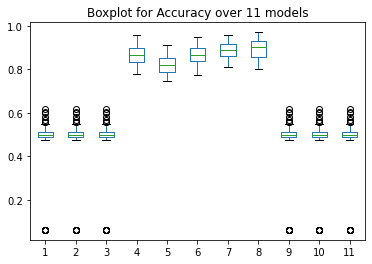

In [ ]:
# BoxPlot for Test Accuracies
import matplotlib.pyplot as plt
fname1='/content/drive/MyDrive/Twitter Sentiment Analysis/smote outputs/Naming_Convention/acc.csv' 
df = pd.read_csv(fname1, names = ['1', '2', '3', '4', '5', '6', '7', '8', '9','10', '11'])
df.plot.box(title='Boxplot for Accuracy over 11 models')


Training and Testing using Model9 and 56.csv


In [10]:
fname='/content/drive/MyDrive/Twitter Sentiment Analysis/smote outputs/Final/'+str(56)+'.csv'
data=np.genfromtxt(fname,delimiter=',')
np.random.shuffle(data)
print(data.shape)


data[:,0:-1]=normalizedata(data[:,0:-1])
trdata, tsdata,  tract, tsact = train_test_split(data[:,0:-1], data[:,-1], test_size=0.3, random_state=10)
predvalue = np.zeros((np.shape(tsdata)[0],2))
pred_score = np.zeros((np.shape(tsdata)[0],1))
predvalue[:,0], pred_score=model9(trdata,tract,tsdata)
predvalue[:,1]=tsact


fname='/content/drive/MyDrive/Twitter Sentiment Analysis/smote outputs/Final/'+str(56)+'trial2.csv'    
np.savetxt(fname,predvalue, delimiter=',', fmt='%f')

(48371, 292)



In [11]:
pred_score

array([[3.00000090e-14, 1.00000000e+00],
       [9.90578479e-01, 9.42152130e-03],
       [7.76968415e-06, 9.99992230e-01],
       ...,
       [2.86083470e-08, 9.99999971e-01],
       [7.79305295e-06, 9.99992207e-01],
       [4.63356060e-13, 1.00000000e+00]])

In [12]:
from sklearn.metrics import (
    f1_score, precision_score, recall_score,accuracy_score, roc_auc_score
    )


for i in range(56,57):
     fname='/content/drive/MyDrive/Twitter Sentiment Analysis/smote outputs/Final/'+str(i)+'trial2.csv'
     data=np.genfromtxt(fname,delimiter=',')
     for j in range(0,1):
         pred=data[:,j]
         fval1 = f1_score(data[:,-1], pred, average="weighted")
         acv1 = accuracy_score(data[:,-1], pred)
         prv1 = precision_score(data[:,-1], pred, average="weighted")
         rev1 = recall_score(data[:,-1], pred, average="weighted")
         auc = roc_auc_score(data[:,-1], pred_score[:, 1], average="weighted" )

print("F-score = ", fval1)
print("Accuracy = ", acv1)
print("Precision = ", prv1)
print("Recall = ", rev1)
print("AUC = ", auc)

F-score =  0.9921380754872522
Accuracy =  0.9921444321940464
Precision =  0.9921546737856787
Recall =  0.9921444321940464
AUC =  0.999632217395486
